# Tutorial 1: Data access core concepts
### `themachinethatgoesping` tutorial series

`themachinethatgoesping` concepts covered:
- Find and list raw data files to process
- Create a File Handler object ot access the file data
- Access a group of pings with the File Handler
- Access data in a ping

In [1]:
import numpy as np
np.__file__

'/ssd/opt/miniforge3/envs/dev/lib/python3.12/site-packages/numpy/__init__.py'

In [2]:
%matplotlib widget

import numpy as np
import themachinethatgoesping as theping
from matplotlib import pyplot as plt
from tqdm.auto import tqdm

In [3]:
theping.version()

themachinethatgoesping
- version:       0.28.1

modules:
- tools_cppy     0.28.4
- tools          @PROJECT_VERSION@
- scripts        @PROJECT_VERSION@
- algorithms     0.9.0
- navigation     0.17.3
- echosounders_cppy 0.45.1
- echosounders   0.45.1
- pingprocessing_cppy 0.11.1
- pingprocessing @PROJECT_VERSION@
- gridding       @PROJECT_VERSION@


### 1. List raw data files with find_files()

In [4]:
# define a folder to search for raw data files
folder = '../unittest_data'

# find all Kongsberg files in the list of folders
files = theping.echosounders.index_functions.find_files(folder, [".all","wcd"])

Found 18 files


In [5]:
# The output of find_files() is a list of file paths, which are strings
print(type(files))
print(type(files[0]))
print(files[0])

<class 'list'>
<class 'str'>
../unittest_data/kongsberg/simon/-8780057642499202963.wcd


In [6]:
# show files found
files.sort()
for i, file in enumerate(files):
    print(f"({i}/{len(files)}) {file}")

(0/18) ../unittest_data/kongsberg/a/c/2720871266855321420.all
(1/18) ../unittest_data/kongsberg/a/c/2720871266855321420.wcd
(2/18) ../unittest_data/kongsberg/a/f/ALL/4590722669055497039.all
(3/18) ../unittest_data/kongsberg/a/f/WCD/4590722669055497039.wcd
(4/18) ../unittest_data/kongsberg/a/y/-7609271985000766481.all
(5/18) ../unittest_data/kongsberg/a/y/-7609271985000766481.wcd
(6/18) ../unittest_data/kongsberg/e/5556426203143536656.all
(7/18) ../unittest_data/kongsberg/e/6340811117880500921.all
(8/18) ../unittest_data/kongsberg/g/4467916373654671126.all
(9/18) ../unittest_data/kongsberg/g/4467916373654671126.wcd
(10/18) ../unittest_data/kongsberg/he/8194075547798063212.all
(11/18) ../unittest_data/kongsberg/he/8194075547798063212.wcd
(12/18) ../unittest_data/kongsberg/simon/-8780057642499202963.all
(13/18) ../unittest_data/kongsberg/simon/-8780057642499202963.wcd
(14/18) ../unittest_data/kongsberg/turbeams/-5459828243338449053.all
(15/18) ../unittest_data/kongsberg/turbeams/-54598282

### 2. Create a File Handler object to access the raw data files

In [7]:
# Create a File Handler to access the raw data files
fileHandler = theping.echosounders.kongsbergall.KongsbergAllFileHandler(files, init=False)

indexing files ⢀ 100% :00s<00m:00s] [..3008643552583898.wcd (18/18)]                                
indexing files ⡀ 100% :00s<00m:00s] [Found: 729 datagrams in 18 files (10MB)]                                         


In [8]:
fileHandler.init_interfaces()
p =fileHandler.get_pings()
p.print()

Initializing ping interface ⢀ 90% :00s<00m:00s] [Done]                                              
PingContainer
#############
-
Time info 
------------            
- Start time: 21/08/2012 17:09:42.36 
- End time:   21/04/2023 17:48:14.72 
- Sorted:     ascending              

 Contained pings 
----------------- 
- Total:    85 
- TRX-102:  35 
- TRX-2004: 7  
- TRX-2031: 7  
- TRX-2086: 4  
- TRX-210:  6  
- TRX-2106: 4  
- TRX-213:  9  
- TRX-221:  7  
- TRX-233:  6  


In [9]:
rp = fileHandler.datagram_interface.datagrams('RuntimeParameters')
print(len(rp))
p = rp[0]
print(p)

38
RuntimeParameters
#################
- bytes:               52       
- stx:                 0x02     
- datagram_identifier: 0x52     [RuntimeParameters]
- model_number:        EM2040   [2040]
- date:                20220730 [YYYYMMDD]
- time_since_midnight: 74864309 [ms]

 date/time 
-----------  
- timestamp: 1659.214e⁶   [s]
- date:      30/07/2022   [MM/DD/YYYY]
- time:      20:47:44.309 [HH:MM:SS]

 datagram content 
------------------             
- ping_counter:                         63074      
- system_serial_number:                 2106       
- operator_station_status:              0          
- processing_unit_status:               0          
- bsp_status:                           0          
- sonar_head_or_transceiver_status:     0          
- mode:                                 0b10000001 
- filter_identifier:                    0b10000010 
- minimum_depth:                        20         [m]
- maximum_depth:                        100        [m]
- absorption_

In [10]:
p.get_system_serial_number()

2106

In [11]:
fileHandler.get_channel_ids()

['TRX-102',
 'TRX-2004',
 'TRX-2031',
 'TRX-2086',
 'TRX-210',
 'TRX-2106',
 'TRX-213',
 'TRX-221',
 'TRX-233']

In [12]:
# Notes:
#   - A File Handler extracts basic information from the files but do not load the acoustic data. It only indexes the datagrams and provides access to them as a combined file stream
#   - A file Handler is initalized with the list of files
#   - A File Handler pairs .all and .wcd files

# See class of a File Hander
type(fileHandler)

themachinethatgoesping.echosounders_cppy.kongsbergall.KongsbergAllFileHandler

In [13]:
# Use the print function to get a summary of the dataset that can be accessed with the File Handler
print(fileHandler)

KongsbergAllFileHandler
#######################
-
File infos 
-------------               
- Number of loaded .all files: : 10       
- Number of loaded .wcd files: : 8        
- Total file size: :             10.71 MB 

 Detected datagrams 
^^^^^^^^^^^^^^^^^^^^ 
- timestamp_first:  21/08/2012 17:09:42.36 
- timestamp_last:   26/07/2024 15:02:51.40 
- Total:            729                    
- Datagrams [0x30]: 3                      [PUIDOutput]
- Datagrams [0x31]: 9                      [PUStatusOutput]
- Datagrams [0x33]: 3                      [ExtraParameters]
- Datagrams [0x41]: 28                     [AttitudeDatagram]
- Datagrams [0x43]: 17                     [ClockDatagram]
- Datagrams [0x47]: 1                      [SurfaceSoundSpeedDatagram]
- Datagrams [0x49]: 18                     [InstallationParametersStart]
- Datagrams [0x4e]: 80                     [RawRangeAndAngle]
- Datagrams [0x4f]: 6                      [QualityFactorDatagram]
- Datagrams [0x50]: 31           

### 3. Access a group of pings with the File Handler

In [14]:
# Access a group of pings from the File Handler with the get_pings() method
pingContainer = fileHandler.get_pings()

# The output is a Ping Container object
type(pingContainer)

themachinethatgoesping.echosounders_cppy.kongsbergall.filedatacontainers.KongsbergAllPingContainer

In [15]:
# Use the print function to get a summary of the contents of a Ping Container
print(pingContainer)

PingContainer
#############
-
Time info 
------------            
- Start time: 21/08/2012 17:09:42.36 
- End time:   21/04/2023 17:48:14.72 
- Sorted:     ascending              

 Contained pings 
----------------- 
- Total:    85 
- TRX-102:  35 
- TRX-2004: 7  
- TRX-2031: 7  
- TRX-2086: 4  
- TRX-210:  6  
- TRX-2106: 4  
- TRX-213:  9  
- TRX-221:  7  
- TRX-233:  6  


### 4. Access an individual ping in the Ping Container


In [16]:
# Access an individual ping in a Ping Container simply by indexing
ping = pingContainer[42]

# The result is a Ping object
type(ping)

themachinethatgoesping.echosounders_cppy.kongsbergall.filetypes.KongsbergAllPing

In [17]:
# Use the print function to get a summary of the contents of a Ping object
print(ping)

KongsbergAllPing
################
-
Ping infos 
-------------                                                                                                                                                                                                                                                                                                                                                                                 
- Channel id:             TRX-233                                                                                                                                                                                                                                                                                                                                                                           
- Time info:              04/05/2015 22:51:13.16                                                                                                                            

### 5. Access data in a ping

In [18]:
# A Ping object has 3 types of information: base, bottom, and water-column. Let's just talk here about the base information

# An example of base information is location
pingLocation = ping.get_geolocation()

# see class of a "Ping Location" object
type(pingLocation)

themachinethatgoesping.navigation.datastructures.GeolocationLatLon

In [19]:
# Use the print function to get a summary of the contents of a Ping Location
print(pingLocation)

GeolocationLatLon (struct)
##########################
- latitude:  75°11'38.1"N  [ddd°mm',ss.s''N/S]
- longitude: 26°47'41.5"E  [ddd°mm',ss.s''E/W]
- z:         3.689         [positive downwards, m]
- yaw:       9.682         [90 ° at east]
- pitch:     0.508         [° positive bow up]
- roll:      -1.153        [° positive port up]


In [20]:
# Data in a Ping Location are simple attributes
print(f"Example ping location - Latitude: {pingLocation.latitude}, Longitude: {pingLocation.longitude}")

Example ping location - Latitude: 75.1939195526917, Longitude: 26.794851991774323


### 6. Conclusion
Putting it all together with an example. If you want to extract latitudes and longitudes from all pings in the entire dataset

Found 18 files
indexing files ⠐ 100% :00s<00m:00s] [..0057642499202963.wcd (1/18)]                               
indexing files ⠠ 100% :00s<00m:00s] [..4075547798063212.all (18/18)]                                
indexing files ⢀ 100% :00s<00m:00s] [Found: 729 datagrams in 18 files (10MB)]                                         
Initializing ping interface ⢀ 90% :00s<00m:00s] [Done]                                              


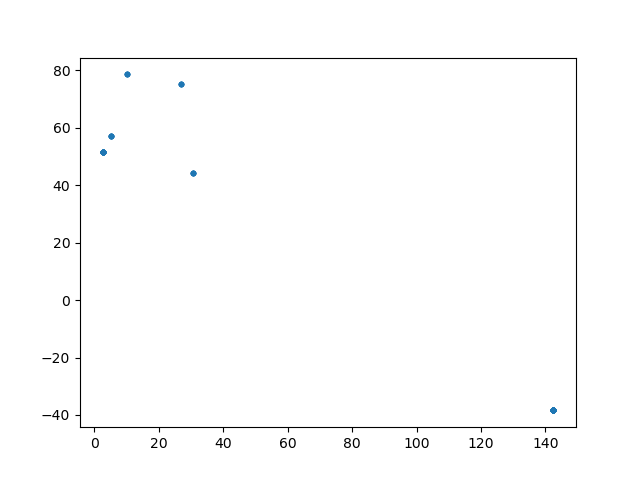

In [21]:
# set folders of data
folder = '../unittest_data'

# list files in folder
files = theping.echosounders.index_functions.find_files(folder, [".all","wcd"]) # find all Kongsberg files in the list of folders

# create a ping container for all pings in the dataset, through a File Handler
fileHandler = theping.echosounders.kongsbergall.KongsbergAllFileHandler(files)
pingContainer = fileHandler.get_pings()

# loop over all pings in the pingContainer and extract latitude and longitude of each ping
lat, lon = [], []
for ping in pingContainer:
    pingLocation = ping.get_geolocation()
    lat.append(pingLocation.latitude) 
    lon.append(pingLocation.longitude)

# plot coordinates of all pings in dataset
plt.figure()
plt.plot(lon, lat, '.')